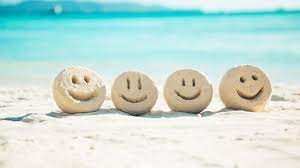

# What makes us happy?
Author: Julia Blake \\
GR5243 Applied Data Science

The goal of this project is to look deeper into the causes that make us happy. Natural language processing and text mining are natural tools to derive interesting findings in this collection of happy moments.

In this project you will carry out an exploratory data analysis of the corpus of HappyDB and write a blog on interesting findings.

## Preliminary Data Exploration

In order to draw any conclusions or relations from this data set, we must first explore what is provided to us. We will do a brief exploration into the variables.

In [17]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p
import pandas as pd

In [18]:
print(sys.version)

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [19]:
folder = 'https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/'
cleaned_hm = pd.read_csv(folder+'cleaned_hm.csv', sep = ",",on_bad_lines='skip')

In [20]:
cleaned_hm.head(3)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise


In [21]:
cleaned_hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100535 entries, 0 to 100534
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   hmid                   100535 non-null  int64 
 1   wid                    100535 non-null  int64 
 2   reflection_period      100535 non-null  object
 3   original_hm            100535 non-null  object
 4   cleaned_hm             100535 non-null  object
 5   modified               100535 non-null  bool  
 6   num_sentence           100535 non-null  int64 
 7   ground_truth_category  14125 non-null   object
 8   predicted_category     100535 non-null  object
dtypes: bool(1), int64(3), object(5)
memory usage: 6.2+ MB


#### hmid, wid

In [42]:
len(cleaned_hm['hmid'].unique()), len(cleaned_hm['wid'].unique())

(100535, 10841)

In [56]:
cleaned_hm.loc[:,"wid"].value_counts().head(10)

4     96
18    96
54    93
31    90
8     90
1     90
11    87
9     87
3     84
28    84
Name: wid, dtype: int64

We have 100,535 entries of happy moments, from 100,535 unique IDs but only 10,841 unique workers. Thus we have the same worker providing multiple happy moments entries. Two workers provided 96 entries of happy moments. At first look this appeared to be a very robust database, however we must keep in mind that although there are over 100,000 entries, they are by just over 10,000 workers. Albeit still a very good sample. Additionally, there are only 14,125 'ground_truth_category' entries.  

#### reflection period

In [107]:
reflection_period_prop = (cleaned_hm.loc[cleaned_hm.reflection_period == '3m', 'reflection_period'].count())/ len(cleaned_hm.reflection_period)
reflection_period_prop

0.5043417715223554

The reflection period was assigned and provided to the workers. Half of the workers had a reflection period of 24 hours and the other half had 3 minutes.

#### number of sentences

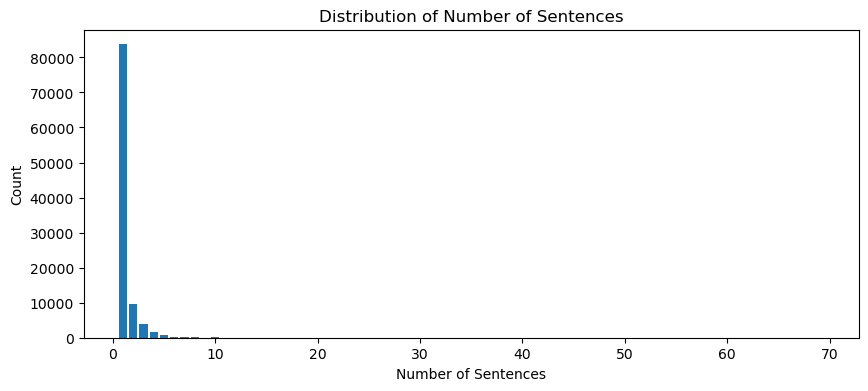

In [66]:
sentence_counts = cleaned_hm['num_sentence'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 4))  # You can adjust the figure size as needed
plt.bar(sentence_counts.index, sentence_counts.values)

# Adding labels and title
plt.xlabel('Number of Sentences')
plt.ylabel('Count')
plt.title('Distribution of Number of Sentences')
plt.show()

In [76]:
cleaned_hm['num_sentence'].max()

69

The length of the entries range from one sentence to 69 sentences!  The majority of entries are completed in just one sentence (83,711), however there were a few workers that were wrote a lot.

#### predicted category

In [30]:
cleaned_hm.loc[:,"predicted_category"].value_counts()

affection           34168
achievement         33993
enjoy_the_moment    11144
bonding             10727
leisure              7458
nature               1843
exercise             1202
Name: predicted_category, dtype: int64

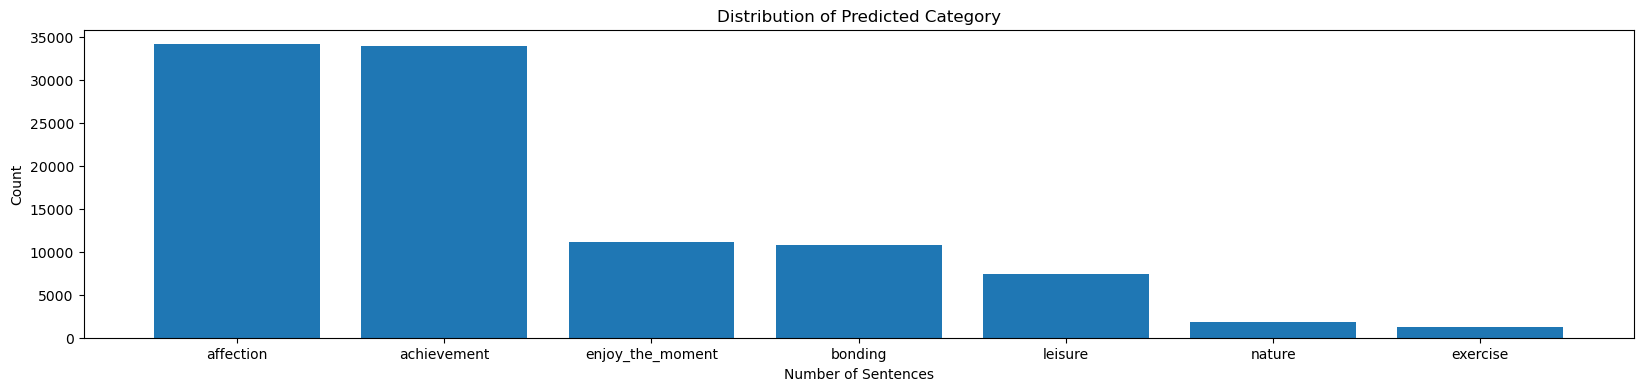

In [82]:
predicted_category_counts = cleaned_hm['predicted_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(20, 4))  # You can adjust the figure size as needed
plt.bar(predicted_category_counts.index, predicted_category_counts.values)

# Adding labels and title
plt.xlabel('Number of Sentences')
plt.ylabel('Count')
plt.title('Distribution of Predicted Category')
plt.show()

In [99]:
prop_affection = (cleaned_hm.loc[cleaned_hm.predicted_category == 'affection', 'predicted_category'].count())/ len(cleaned_hm.predicted_category) *100
prop_achievement = (cleaned_hm.loc[cleaned_hm.predicted_category == 'achievement', 'predicted_category'].count())/ len(cleaned_hm.predicted_category) *100
print(prop_affection, prop_achievement)

33.986173969264435 33.81210523698214


Thus, we can see that the categories that tend to provide the most happy moments were those revolving around affection (33.99%), and achievement (33.81%. 

### Cleaning data

Text(0.5, 1.0, 'Missing data')

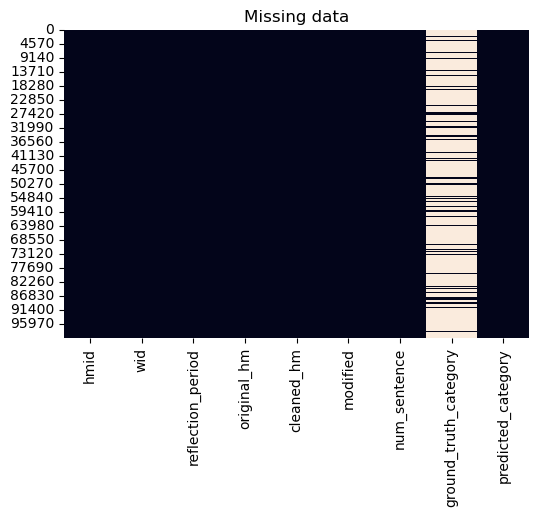

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cleaned_hm.isnull(), cbar=False)
plt.title('Missing data')

## Find your question

### Modelling
Sentiment analysis, Clustering techniques, Topic modelling (LDA, word2vec)...

In [122]:
import nltk

nltk.download(['stopwords','vader_lexicon']) #download aspects of nltk needed for cleaning and analysis
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [123]:
## Tokenize and preprocess the text, removing stopwords
stop_words = set(stopwords.words('english')+['-pron-',',','.',';',':','?','!','-','--'])
word_counts = Counter()

In [125]:
for text in cleaned_hm["cleaned_hm"]:
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    word_counts.update(filtered_tokens)

# Get the most common words and their frequencies
num_most_common = 20
most_common_words = word_counts.most_common(num_most_common)

# Print the most common words and their frequencies
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")


happy: 37430
got: 26762
made: 22846
went: 19232
time: 18520
new: 17736
day: 16068
work: 15694
last: 12772
friend: 12274
good: 11686
really: 10726
one: 10646
able: 10242
today: 10152
friends: 9390
family: 9248
first: 9120
home: 8388
get: 7874


### Data visualisation

In [23]:
import sys
import os

In [108]:
#module_path = '/Users/clairehe/Documents/GitHub/STATGR2022/Example/codes'
module_path = 'C:/Users/julia/OneDrive/Documents/GitHub/ads-fall2023-project1-juliamblake1/lib'
if module_path not in sys.path:
    sys.path.append(module_path)

In [109]:
from codes.wordcloud_maker import *

ModuleNotFoundError: No module named 'codes'

In [ ]:
make_word_cloud(cleaned_hm)

In [ ]:
sns.histplot(cleaned_hm['num_sentence'])

## Conclusion

#### Links

In [ ]:
https://github.com/megagonlabs/HappyDB/tree/master
